In [55]:
import re
import pandas as pd
import time 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# ベイスターズの投手の配球を分析
ball_distribution = pd.read_csv('data/ball_distribution_yokohama_defence.csv')

In [57]:
ball_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      16977 non-null  int64  
 1   date       16977 non-null  int64  
 2   top        16977 non-null  int64  
 3   left       16977 non-null  int64  
 4   pitcher    16977 non-null  object 
 5   batter     16977 non-null  object 
 6   batter_rl  16977 non-null  object 
 7   type       16977 non-null  object 
 8   speed      15880 non-null  float64
 9   result     16977 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.3+ MB


In [58]:
#speedに欠損
# 欠損のある行を削除
ball_distribution = ball_distribution.dropna()

In [59]:
# 型変換
ball_distribution["speed"] = ball_distribution["speed"].astype(int)
# 空白、改行、[]削除
ball_distribution["result"] = ball_distribution["result"].str.replace(" ","").str.replace("\n","").str.replace(r"\[.+\]","")

In [60]:
ball_distribution["result"].value_counts()

ボール     5513
ファウル    2831
見逃し     2648
空振り     1090
空三振      629
        ... 
左ゴロ        1
捕併打        1
中失         1
投犠野        1
右失         1
Name: result, Length: 81, dtype: int64

#### ストライクゾーンの確認
- ストライクゾーンはhtmlのピクセル値から推定
- 念のためボール判定のボールを確認

<ipython-input-61-2350124c8a32>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')
<ipython-input-61-2350124c8a32>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


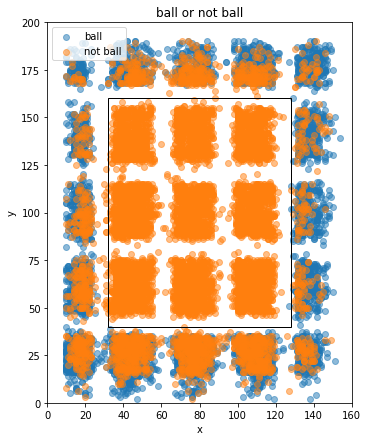

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,7

ballzone = ball_distribution[ball_distribution["result"]=="ボール"]
strike_out = ball_distribution[ball_distribution["result"]!="ボール"]

x1 = ballzone["left"]+10
y1 = 200-ballzone["top"]-10

x2 = strike_out["left"]+10
y2 = 200-strike_out["top"]-10

fig = plt.figure()
ax = fig.add_subplot(111)
rect = plt.Rectangle((32,40),96,120,fill=False) #ストライクゾーン
ax.add_patch(rect)

ax.scatter(x1, y1,alpha=0.5,label="ball")
ax.scatter(x2, y2,alpha=0.5,label="not ball")

plt.xlim(0, 160)
plt.ylim(0, 200)
plt.axes().set_aspect('equal')

ax.set_title('ball or not ball')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend(loc='best')
fig.show()

<ipython-input-62-f3f2443a6897>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


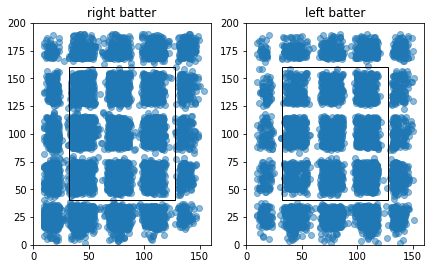

In [62]:
rightbatter = ball_distribution[ball_distribution["batter_rl"]=="右"]
leftbatter = ball_distribution[ball_distribution["batter_rl"]=="左"]


x1 = rightbatter["left"]+10
y1 = 200-rightbatter["top"]-10

x2 = leftbatter["left"]+10
y2 = 200-leftbatter["top"]-10

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
rect1 = plt.Rectangle((32,40),96,120,fill=False)
rect2 = plt.Rectangle((32,40),96,120,fill=False)
ax1.add_patch(rect1)
ax2.add_patch(rect2)

ax1.scatter(x1, y1,alpha=0.5)
ax2.scatter(x2, y2,alpha=0.5)

ax1.set_title('right batter')
ax2.set_title('left batter')

ax1.set_xlim(0, 160)
ax1.set_ylim(0, 200)
ax2.set_xlim(0, 160)
ax2.set_ylim(0, 200)

ax1.set_aspect('equal')
ax2.set_aspect('equal')
fig.show()

In [63]:
rightbatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10040 entries, 92 to 16976
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10040 non-null  int64 
 1   date       10040 non-null  int64 
 2   top        10040 non-null  int64 
 3   left       10040 non-null  int64 
 4   pitcher    10040 non-null  object
 5   batter     10040 non-null  object
 6   batter_rl  10040 non-null  object
 7   type       10040 non-null  object
 8   speed      10040 non-null  int32 
 9   result     10040 non-null  object
dtypes: int32(1), int64(4), object(5)
memory usage: 823.6+ KB


In [64]:
leftbatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 16962
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      5840 non-null   int64 
 1   date       5840 non-null   int64 
 2   top        5840 non-null   int64 
 3   left       5840 non-null   int64 
 4   pitcher    5840 non-null   object
 5   batter     5840 non-null   object
 6   batter_rl  5840 non-null   object
 7   type       5840 non-null   object
 8   speed      5840 non-null   int32 
 9   result     5840 non-null   object
dtypes: int32(1), int64(4), object(5)
memory usage: 479.1+ KB


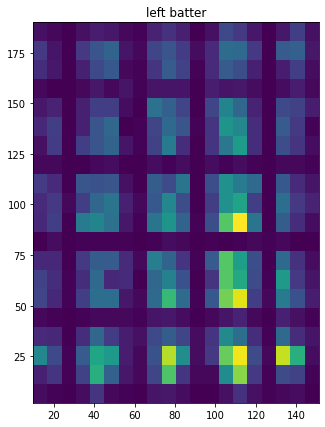

In [65]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# Generate some test data
x1 = leftbatter["left"]+10
y1 = 200-leftbatter["top"]-10
fig = plt.figure()
heatmap, xedges, yedges = np.histogram2d(x1, y1, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.xlim(0, 160)
plt.ylim(0, 200)

plt.clf()
plt.title("left batter")
plt.imshow(heatmap.T, extent=extent, origin='lower')
fig.savefig("left.png")
plt.show()

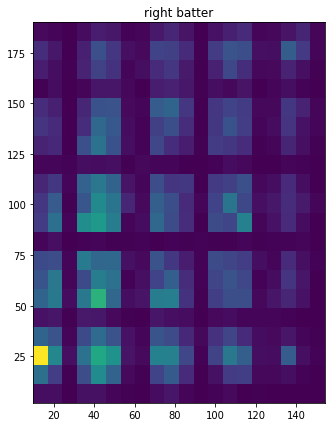

In [66]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 7,7
# Generate some test data
x2 = rightbatter["left"]+10
y2 = 200-rightbatter["top"]-10
fig = plt.figure()
heatmap, xedges, yedges = np.histogram2d(x2, y2, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.xlim(0, 160)
plt.ylim(0, 200)
plt.clf()
plt.title("right batter")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()
fig.savefig("right.png")

In [67]:
ball_distribution_onuki = ball_distribution[ball_distribution["pitcher"]=="大貫 晋一"]
ball_distribution_inou = ball_distribution[ball_distribution["pitcher"]=="井納 翔一"]
ball_distribution_hamaguchi = ball_distribution[ball_distribution["pitcher"]=="濵口 遥大"]

<ipython-input-68-8c2ac87a29fc>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


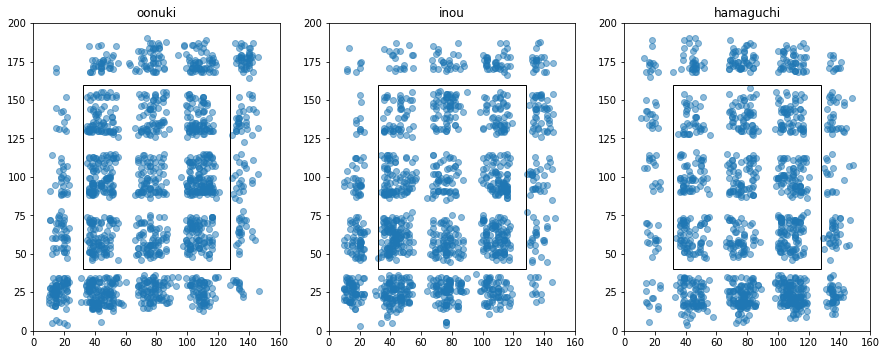

In [68]:
# ピクセル値の調整

rcParams['figure.figsize'] = 15,15
x1 = ball_distribution_onuki["left"]+10
y1 = 200-ball_distribution_onuki["top"]-10

x2 = ball_distribution_inou["left"]+10
y2 = 200-ball_distribution_inou["top"]-10

x3 = ball_distribution_hamaguchi["left"]+10
y3 = 200-ball_distribution_hamaguchi["top"]-10

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
rect1 = plt.Rectangle((32,40),96,120,fill=False)
rect2 = plt.Rectangle((32,40),96,120,fill=False)
rect3 = plt.Rectangle((32,40),96,120,fill=False)
ax1.add_patch(rect1)
ax2.add_patch(rect2)
ax3.add_patch(rect3)

ax1.scatter(x1, y1,alpha=0.5)
ax2.scatter(x2, y2,alpha=0.5)
ax3.scatter(x3, y3,alpha=0.5)

ax1.set_title('oonuki')
ax2.set_title('inou')
ax3.set_title('hamaguchi')

ax1.set_xlim(0, 160)
ax1.set_ylim(0, 200)
ax2.set_xlim(0, 160)
ax2.set_ylim(0, 200)
ax3.set_xlim(0, 160)
ax3.set_ylim(0, 200)

ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
fig.show()

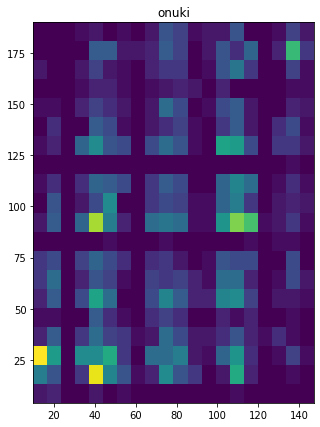

In [70]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 7,7
# Generate some test data
x2 = ball_distribution_onuki["left"]+10
y2 = 200-ball_distribution_onuki["top"]-10

heatmap, xedges, yedges = np.histogram2d(x2, y2, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.xlim(0, 160)
plt.ylim(0, 200)
plt.clf()
plt.title("onuki")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

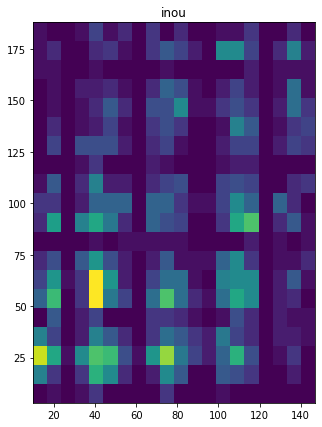

In [71]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# Generate some test data
x2 = ball_distribution_inou["left"]+10
y2 = 200-ball_distribution_inou["top"]-10

heatmap, xedges, yedges = np.histogram2d(x2, y2, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.xlim(0, 160)
plt.ylim(0, 200)
plt.clf()
plt.title("inou")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

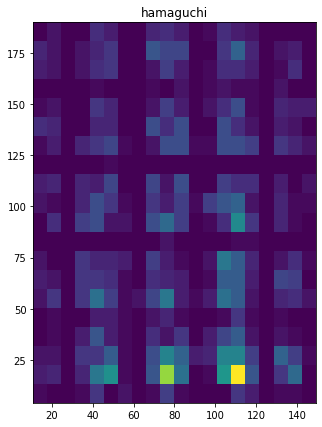

In [72]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# Generate some test data
x2 = ball_distribution_hamaguchi["left"]+10
y2 = 200-ball_distribution_hamaguchi["top"]-10

heatmap, xedges, yedges = np.histogram2d(x2, y2, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.xlim(0, 160)
plt.ylim(0, 200)
plt.clf()
plt.title("hamaguchi")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()